# Quantum information visualizations

## Plot states <a name='states'></a>

In many situations – such as learning or debugging – it's helpful to visualize the state of a quantum computer. Here we assume you already have a particular state (either from simulation or state tomography). These visualizations require resources exponential in the number of qubits, so it's only possible to view the states of small quantum systems.

A quantum state is either a density matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The density matrix ($\rho$) is related to the statevector $|\psi\rangle$ by

$$\rho = |\psi\rangle\langle \psi|,$$

and is more general as it can represent mixed states (positive sum of statevectors)

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$$

Qiskit represents quantum states through the `Statevector` and `DensityMatrix` classes and provides the following visualization functions:

- `plot_state_city`: Displays the real and imaginary parts of each density matrix element in two 3D bar charts. The bars resemble skyscrapers in a city.

- `plot_state_hinton`: Similar to `plot_state_city`, but each element is represented by the brightness of a square rather than the height of a bar.

- `plot_state_qsphere`: A Qiskit-unique view of a quantum state where the amplitude and phase of a state vector are plotted on the surface of a sphere. The thickness of each arrow represent the amplitude and the phase represents the color. For mixed states it will show a sphere for each component.

- `plot_state_paulivec`: Displays the expectation values of different Pauli operators in the quantum state as a bar chart.

- `plot_bloch_multivector`: The projection of the quantum state onto the single-qubit space and plotting on a Bloch sphere.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    plot_state_city,
    plot_bloch_multivector,
    plot_state_paulivec,
    plot_state_hinton,
    plot_state_qsphere,
)

# Create a Bell state for demonstration
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
psi = Statevector(bell)

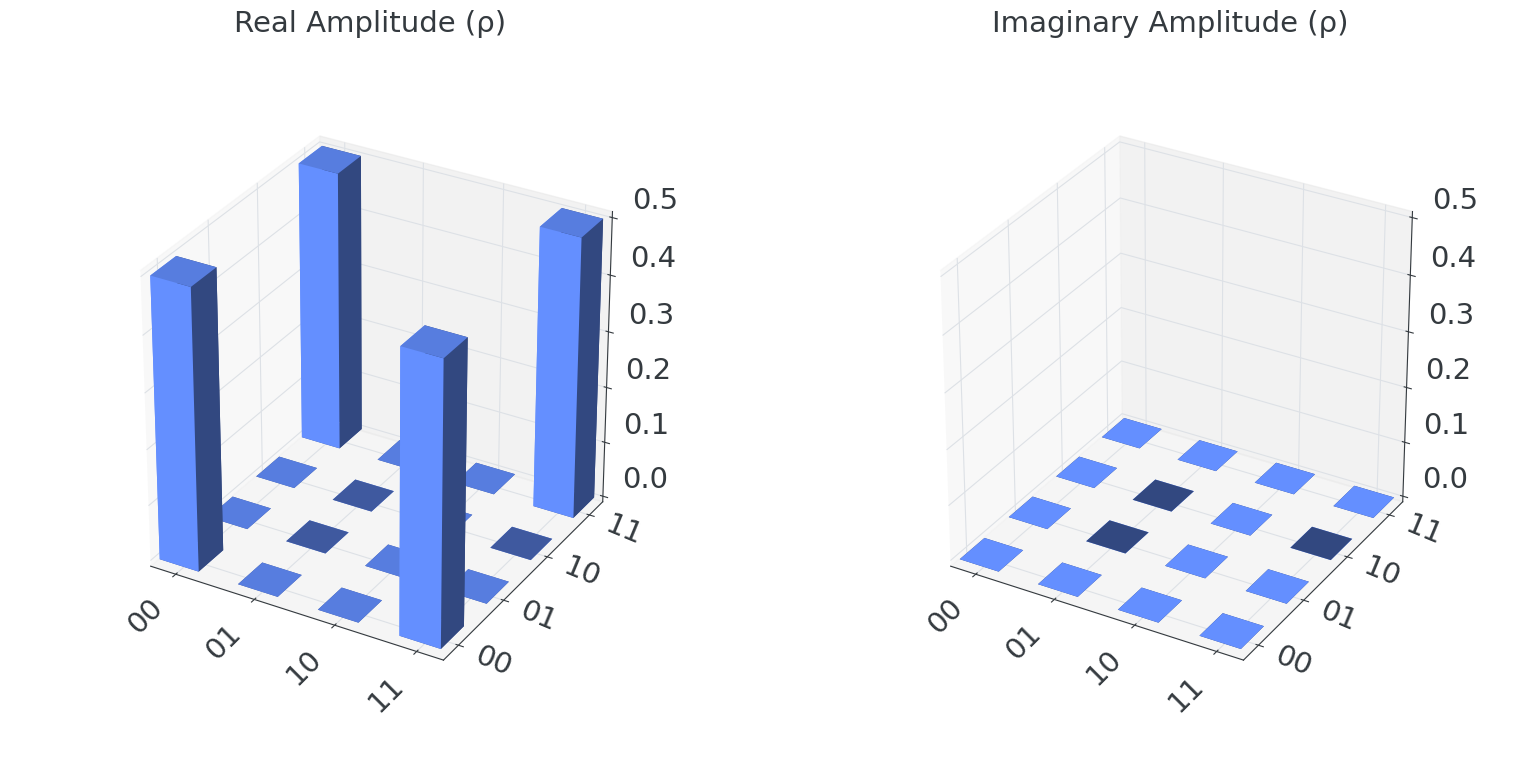

In [2]:
plot_state_city(psi)

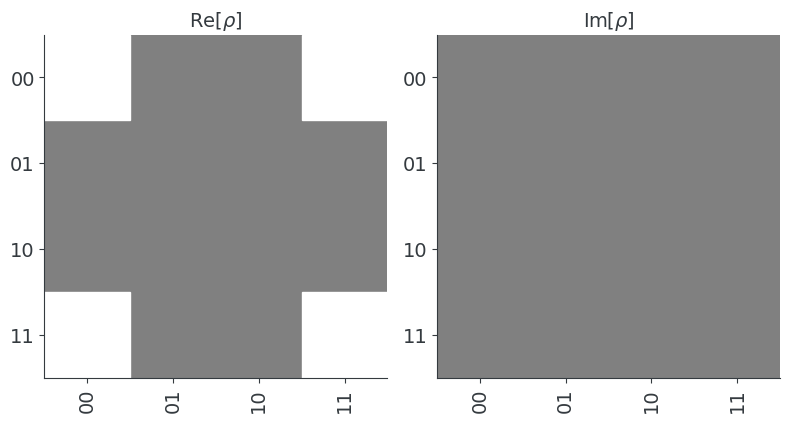

In [3]:
plot_state_hinton(psi)

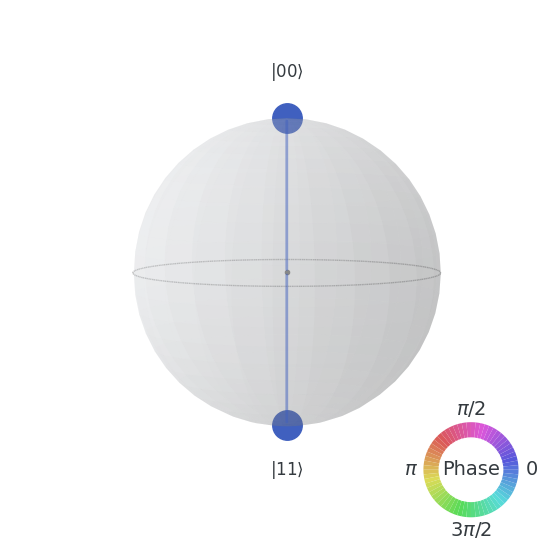

In [4]:
plot_state_qsphere(psi)

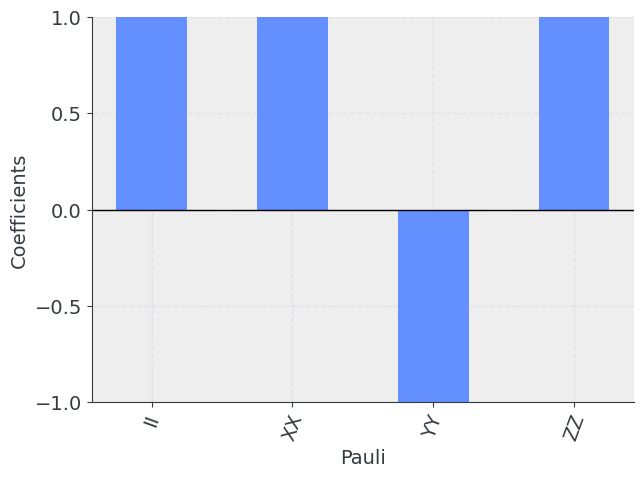

In [5]:
plot_state_paulivec(psi)

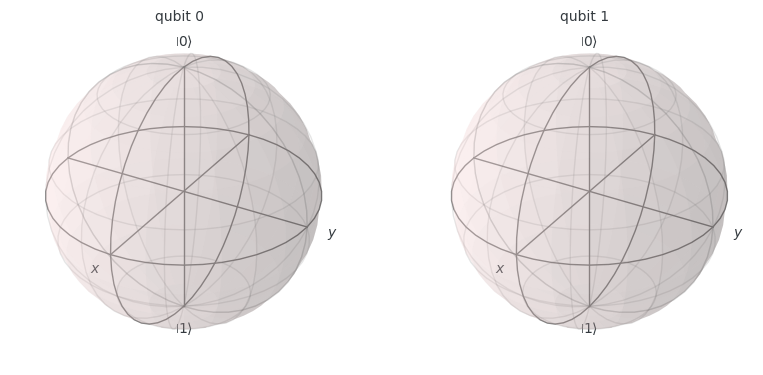

In [6]:
plot_bloch_multivector(psi)

Here we see that there is no information about the quantum state in the single-qubit space as all vectors are zero.

### Options when using state plotting functions

The various functions for plotting quantum states provide a number of options to adjust how the plots are rendered. Which options are available depends on the function being used.

#### **plot_state_city()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height)
- **color** (list): a list of len=2 giving colors for real and imaginary components of matrix elements

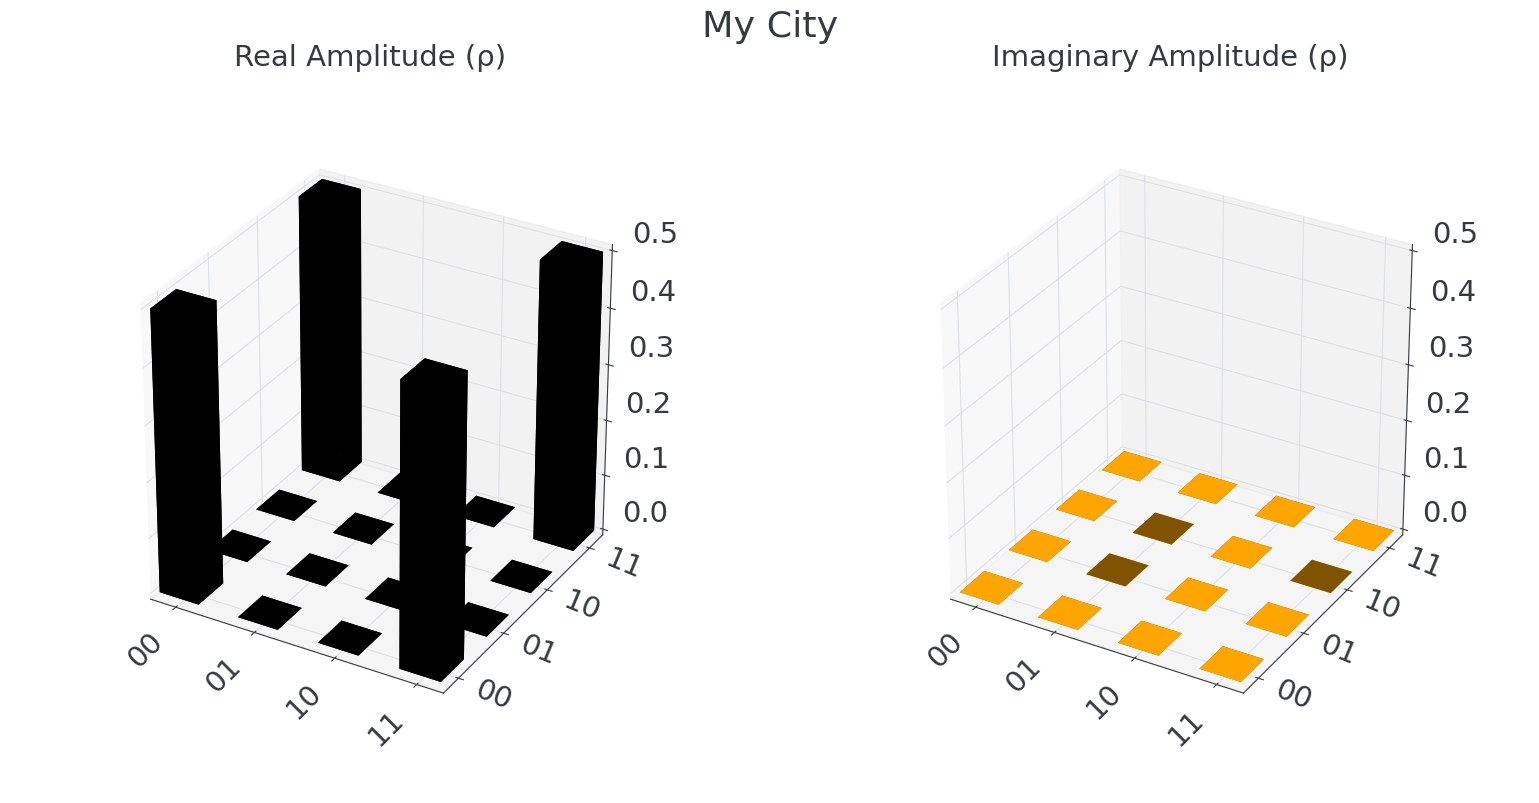

In [7]:
plot_state_city(psi, title="My City", color=["black", "orange"])

#### **plot_state_hinton()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height)

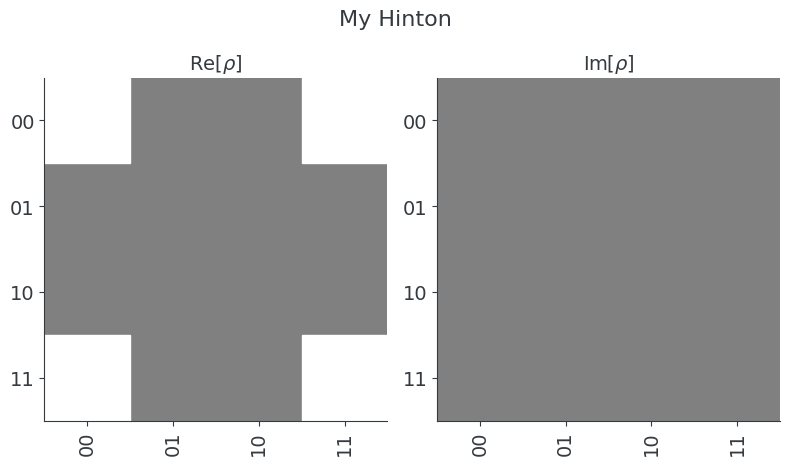

In [8]:
plot_state_hinton(psi, title="My Hinton")

#### **plot_state_paulivec()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height)
- **color** (list or str): color of the expectation value bars

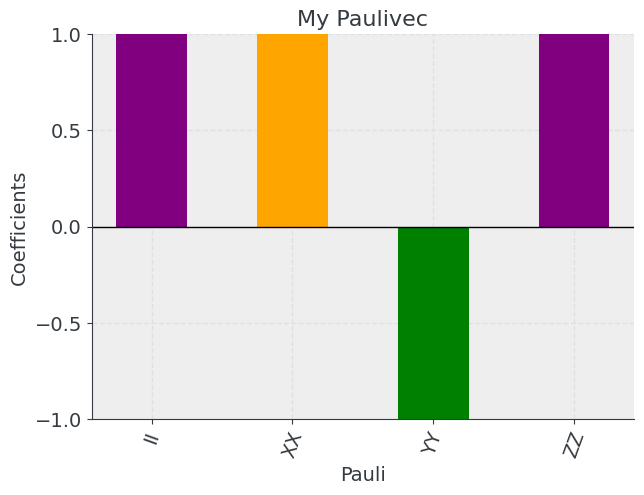

In [9]:
plot_state_paulivec(psi, title="My Paulivec", color=["purple", "orange", "green"])

#### **plot_state_qsphere()** options

- **figsize** (tuple): figure size in inches (width, height)

#### **plot_bloch_multivector()** options

- **title** (str): a string that represents the plot title
- **figsize** (tuple): figure size in inches (width, height)

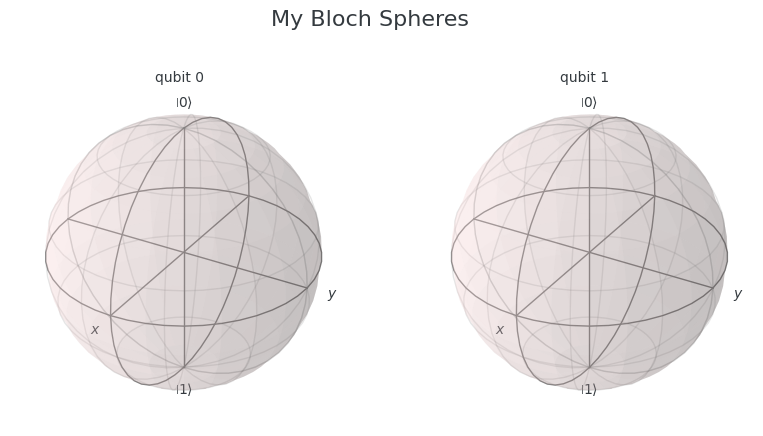

In [10]:
plot_bloch_multivector(psi, title="My Bloch Spheres")

### Use the output from state plotting functions

The state plotting functions return a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and render it properly, but when running outside of Jupyter, this feature is not automatic. However, the `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive). Alternatively, call `.savefig('out.png')` to save the figure to `out.png` in the current working directory. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output.

## Plot Bloch vector <a name='bloch'></a>

A standard way to plot a quantum system is with the Bloch vector. This only works for a single qubit and takes as input the Bloch vector.

The Bloch vector is defined as $[x = \mathrm{Tr}[X \rho], y = \mathrm{Tr}[Y \rho], z = \mathrm{Tr}[Z \rho]]$, where $X$, $Y$, and $Z$ are the Pauli operators for a single qubit and $\rho$ is the density matrix.

In [11]:
from qiskit.visualization import plot_bloch_vector

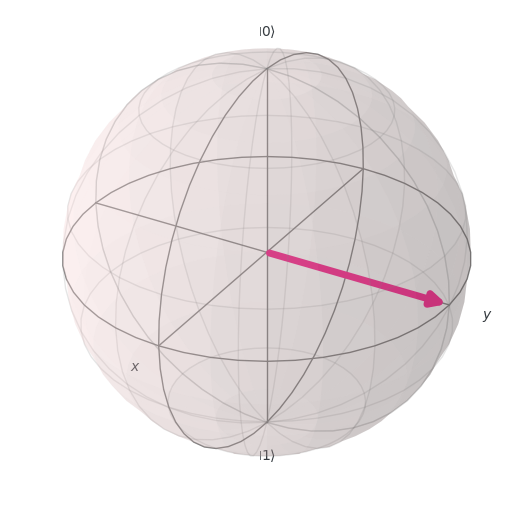

In [12]:
plot_bloch_vector([0, 1, 0])

### Options for plot_bloch_vector()

- **title** (str): a string that represents the plot title
- **figsize** (tuple): Figure size in inches (width, height)

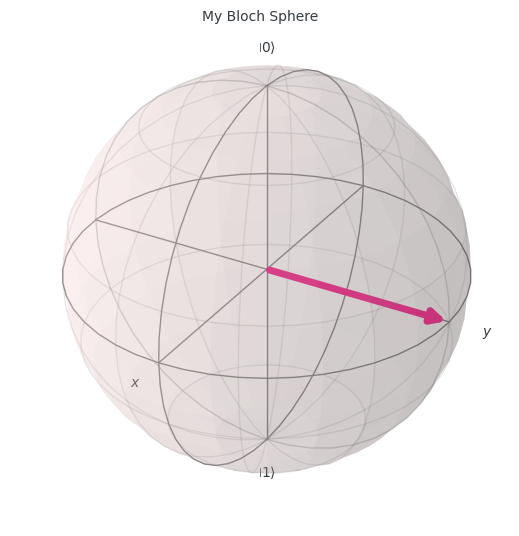

In [13]:
plot_bloch_vector([0, 1, 0], title="My Bloch Sphere")

### Adjust the output from plot_bloch_vector()

The `plot_bloch_vector` function returns a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and render it properly, but when running outside of Jupyter, this feature is not automatic. However, the `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object to open the image in a new window (assuming your configured matplotlib backend is interactive). Alternatively, call `.savefig('out.png')` to save the figure to `out.png` in the current working directory. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output.